In [33]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [34]:
df = pd.read_csv("motor_bldc_arcsec_data.csv")

In [35]:
df.describe()

,timestep,position_theoretical_deg,position_real_deg,current_A
count,1.296000e+06,1.296000e+06,1.296000e+06,1.296000e+06
mean,6.479995e+05,1.799999e+02,1.799999e+02,1.220943e-04
std,3.741231e+05,1.039231e+02,1.039231e+02,1.000663e-02
min,0.000000e+00,0.000000e+00,-2.154494e-04,-4.623303e-02
25%,3.239998e+05,8.999993e+01,8.999947e+01,-6.622974e-03
50%,6.479995e+05,1.799999e+02,1.800002e+02,1.253349e-04
75%,9.719992e+05,2.699998e+02,2.700002e+02,6.861903e-03
max,1.295999e+06,3.599997e+02,3.600025e+02,4.996131e-02


In [36]:
df.info()

df =  df[:500]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296000 entries, 0 to 1295999
Data columns (total 4 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   timestep                  1296000 non-null  int64  
 1   position_theoretical_deg  1296000 non-null  float64
 2   position_real_deg         1296000 non-null  float64
 3   current_A                 1296000 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 39.6 MB


In [37]:
df['erreur_position'] = df['position_theoretical_deg'] - df['position_real_deg']
df['variation_position_theoretical'] = df['position_theoretical_deg'].diff()
df['variation_position_real'] = df['position_real_deg'].diff()
df['diff_courant'] = df['current_A'].diff()
df['proximité'] = np.abs(df['position_theoretical_deg'] - df['position_real_deg']) / df['position_theoretical_deg']

                                timestep  position_theoretical_deg  \
timestep                        1.000000                  1.000000   
position_theoretical_deg        1.000000                  1.000000   
position_real_deg               0.958161                  0.958161   
current_A                      -0.037788                 -0.037788   
erreur_position                -0.404547                 -0.404547   
variation_position_theoretical  0.006295                  0.006295   
variation_position_real        -0.010196                 -0.010196   
diff_courant                   -0.000816                 -0.000816   
proximité                      -0.107458                 -0.107458   

                                position_real_deg  current_A  erreur_position  \
timestep                                 0.958161  -0.037788        -0.404547   
position_theoretical_deg                 0.958161  -0.037788        -0.404547   
position_real_deg                        1.000000  -0.02

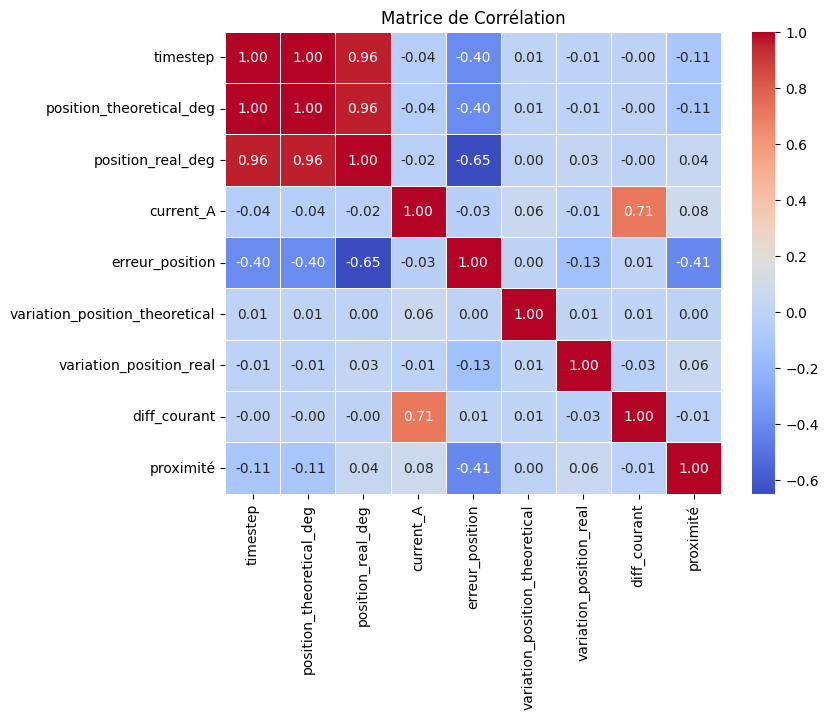

In [38]:
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

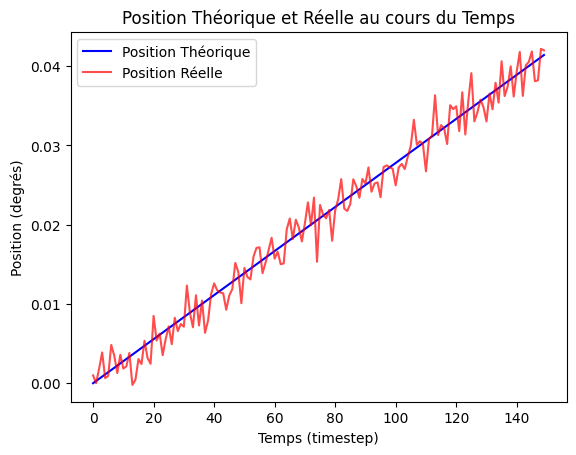

In [ ]:
plt.figure()
dfcopy =  df.copy()
position_real_degdf = df[:150]

plt.plot(df["timestep"], df["position_theoretical_deg"], label="Position Théorique", color="blue")
plt.plot(df["timestep"], df["position_real_deg"], label="Position Réelle", color="red", alpha=0.7)
plt.title('Position Théorique et Réelle au cours du Temps')
plt.xlabel('Temps (timestep)')
plt.ylabel('Position (degrés)')
plt.legend()

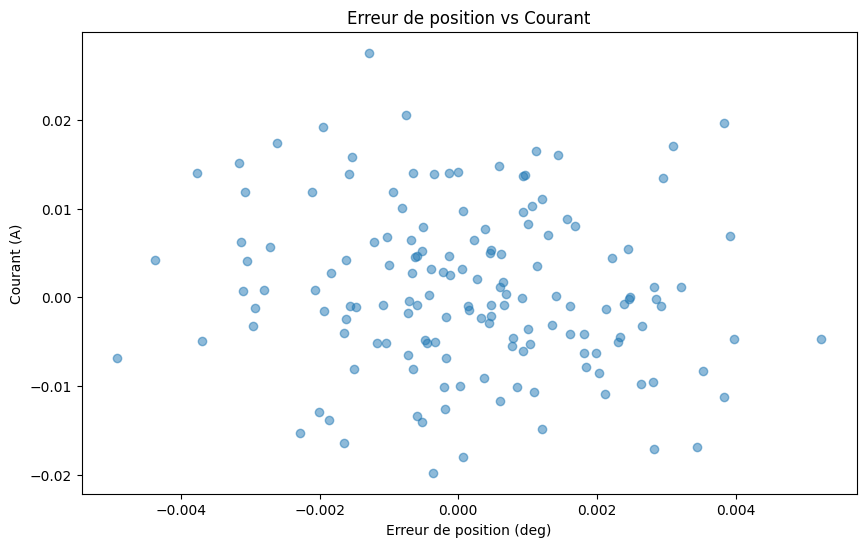

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['erreur_position'], df['current_A'], alpha=0.5)
plt.xlabel('Erreur de position (deg)')
plt.ylabel('Courant (A)')
plt.title('Erreur de position vs Courant')
plt.show()

Text(0, 0.5, 'Fréquence')

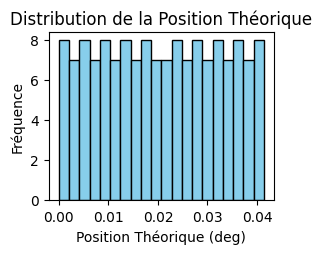

In [41]:
plt.subplot(2, 2, 1)
plt.hist(df['position_theoretical_deg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution de la Position Théorique')
plt.xlabel('Position Théorique (deg)')
plt.ylabel('Fréquence')

Text(0, 0.5, 'Fréquence')

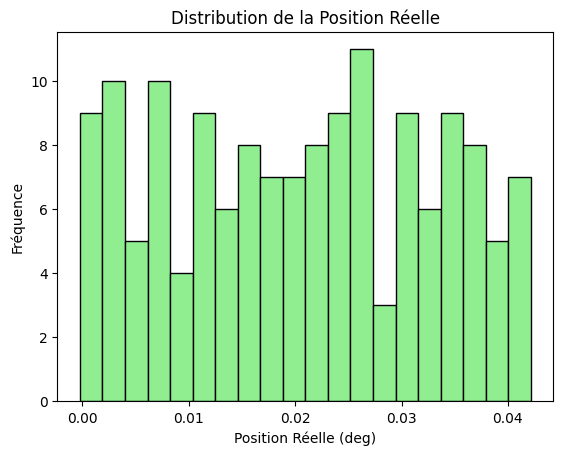

In [42]:
plt.hist(df['position_real_deg'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution de la Position Réelle')
plt.xlabel('Position Réelle (deg)')
plt.ylabel('Fréquence')

Text(0, 0.5, 'Fréquence')

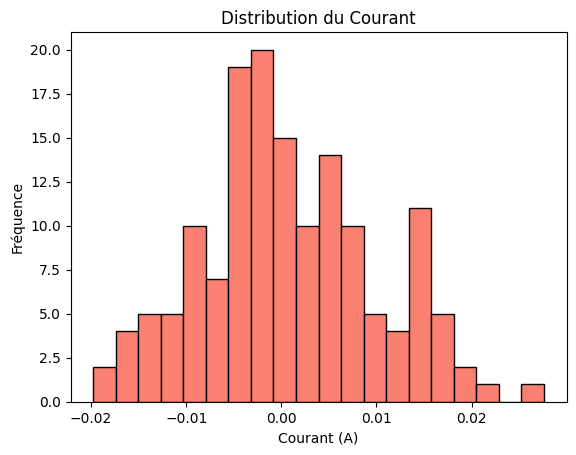

In [43]:
plt.hist(df['current_A'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution du Courant')
plt.xlabel('Courant (A)')
plt.ylabel('Fréquence')

Text(0, 0.5, 'Fréquence')

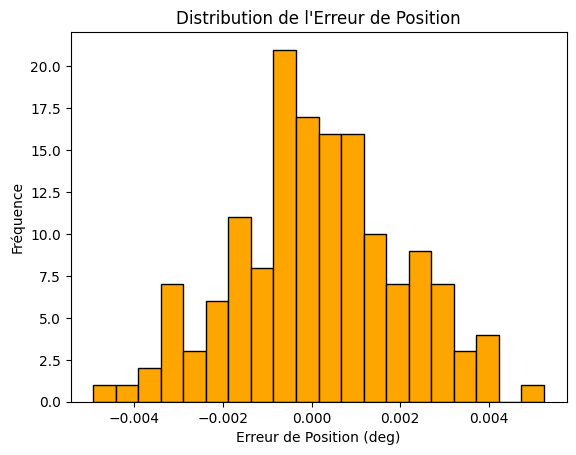

In [44]:
plt.hist(df['erreur_position'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution de l\'Erreur de Position')
plt.xlabel('Erreur de Position (deg)')
plt.ylabel('Fréquence')

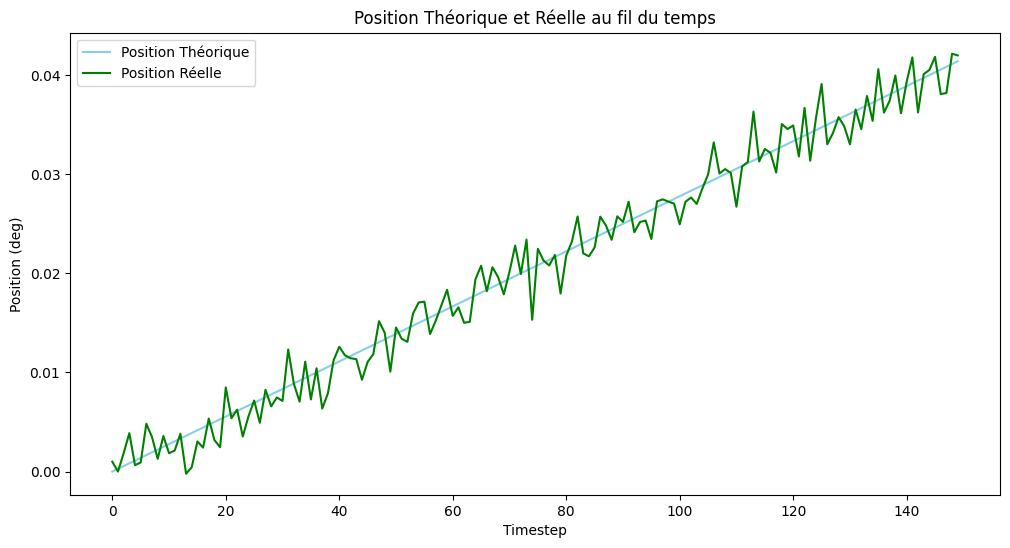

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestep'], df['position_theoretical_deg'], label='Position Théorique', color='skyblue')
plt.plot(df['timestep'], df['position_real_deg'], label='Position Réelle', color='green')
plt.title('Position Théorique et Réelle au fil du temps')
plt.xlabel('Timestep')
plt.ylabel('Position (deg)')
plt.legend()
plt.show()

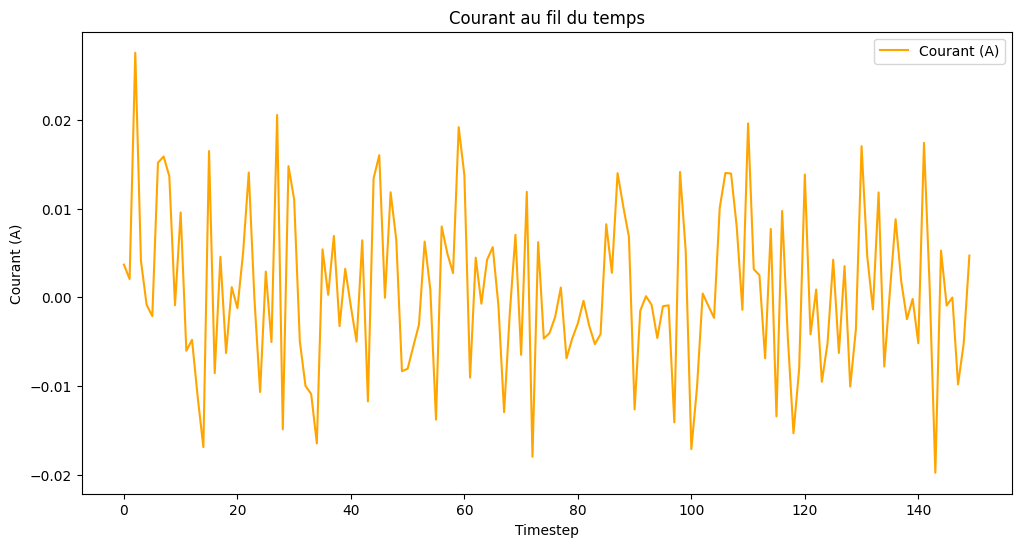

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestep'], df['current_A'], label='Courant (A)', color='orange')
plt.title('Courant au fil du temps')
plt.xlabel('Timestep')
plt.ylabel('Courant (A)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Boxplot de la Position Théorique')

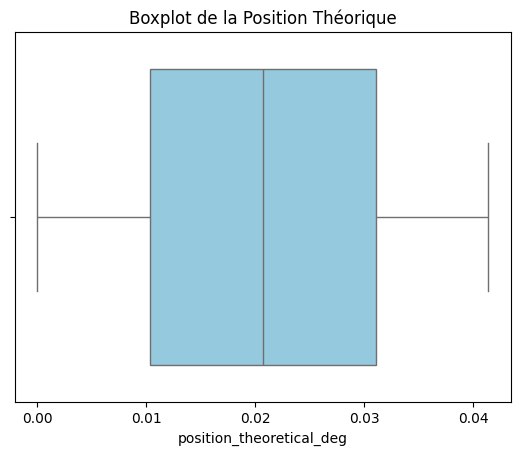

In [47]:
sns.boxplot(x=df['position_theoretical_deg'], color='skyblue')
plt.title('Boxplot de la Position Théorique')

Text(0.5, 1.0, 'Boxplot de la Position Réelle')

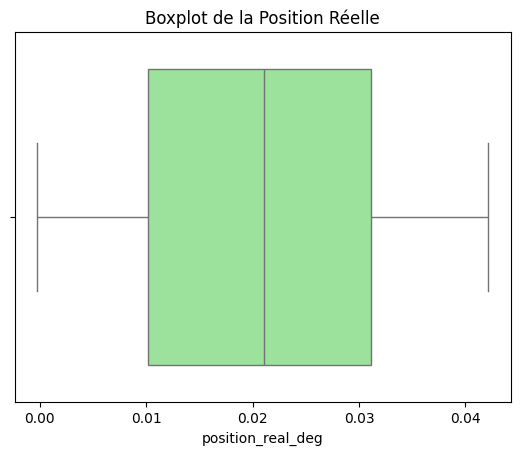

In [48]:
sns.boxplot(x=df['position_real_deg'], color='lightgreen')
plt.title('Boxplot de la Position Réelle')

Text(0.5, 1.0, 'Boxplot du Courant')

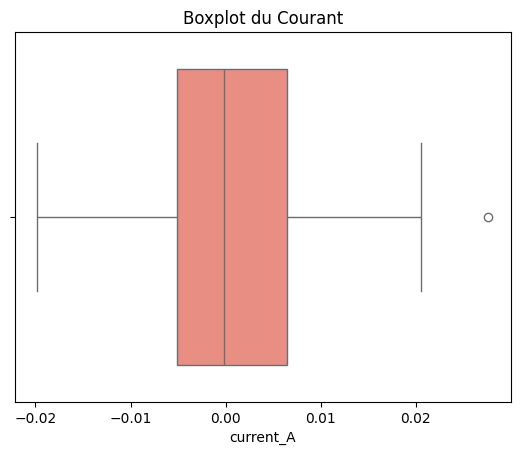

In [50]:
sns.boxplot(x=df['current_A'], color='salmon')
plt.title('Boxplot du Courant')

Text(0.5, 1.0, "Boxplot de l'Erreur de Position")

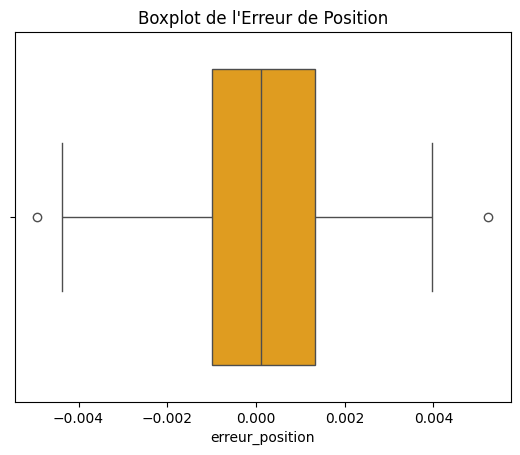

In [49]:
sns.boxplot(x=df['erreur_position'], color='orange')
plt.title('Boxplot de l\'Erreur de Position')

Moyenne Mobile

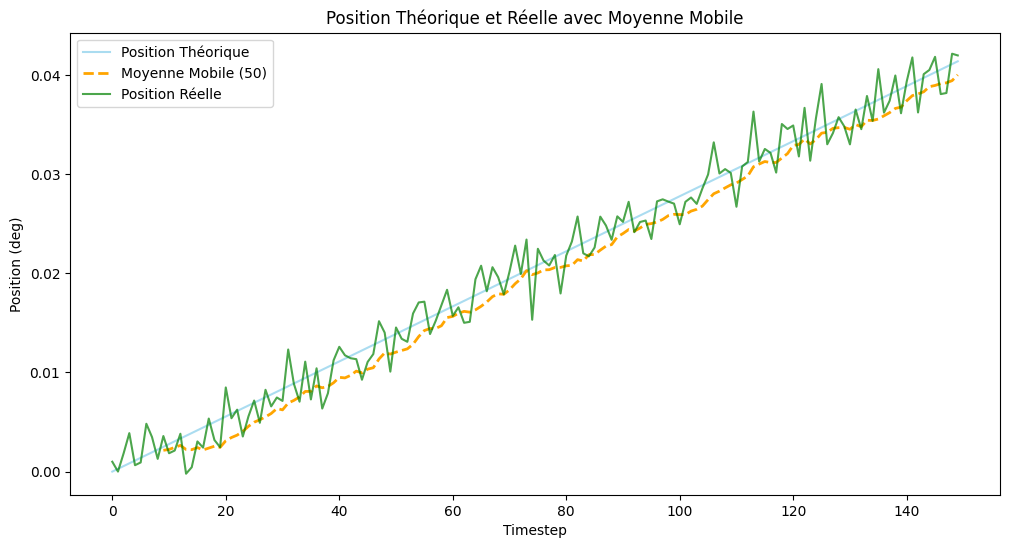

In [55]:
df['ma_position_theoretical'] = df['position_real_deg'].rolling(window=10).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['timestep'], df['position_theoretical_deg'], label='Position Théorique', color='skyblue', alpha=0.7)

plt.plot(df['timestep'], df['ma_position_theoretical'], label='Moyenne Mobile (50)', color='orange', linestyle='--', linewidth=2)

plt.plot(df['timestep'], df['position_real_deg'], label='Position Réelle', color='green', alpha=0.7)

plt.title('Position Théorique et Réelle avec Moyenne Mobile')
plt.xlabel('Timestep')
plt.ylabel('Position (deg)')

plt.legend()

plt.show()


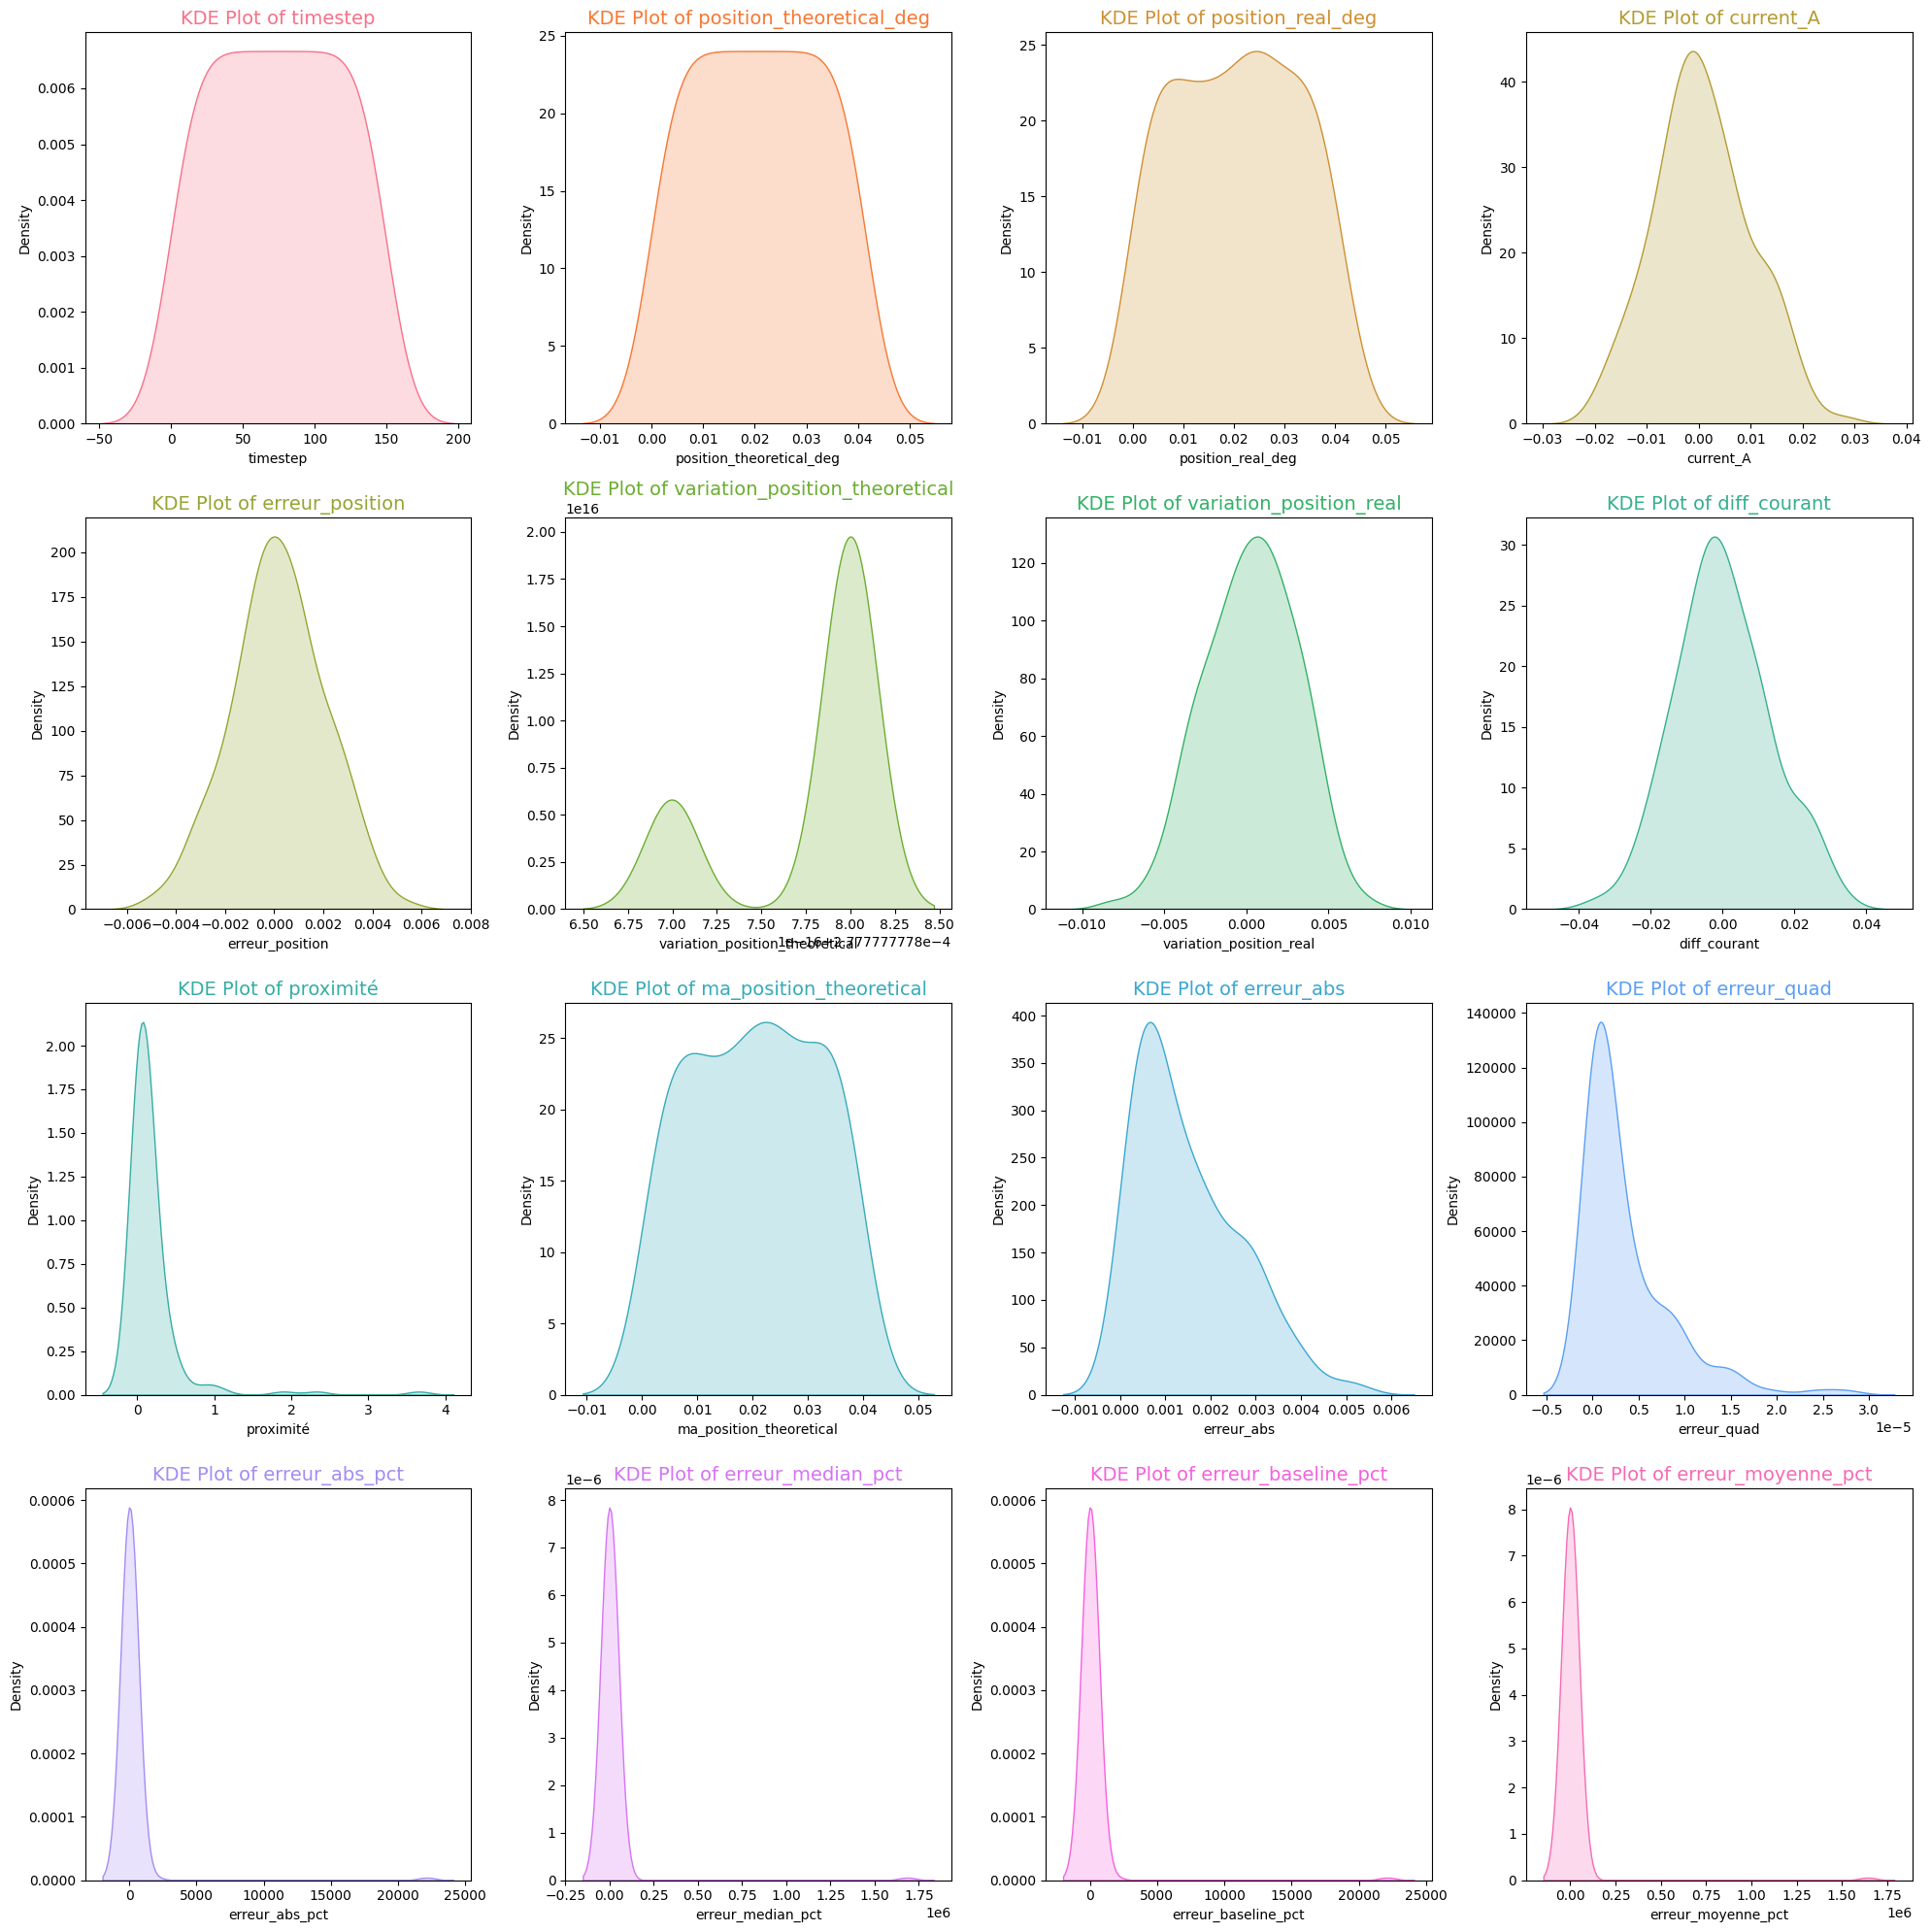

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette('husl', len(df.columns))

rows = -(-len(df.columns) // 4)
plt.figure(figsize=(20, 5 * rows))

for i, (col, color) in enumerate(zip(df.columns, colors), 1):
    plt.subplot(rows, 4, i)
    sns.kdeplot(data=df, x=col, fill=True, color=color)
    plt.title(f'KDE Plot of {col}', fontsize=14, color=color)
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

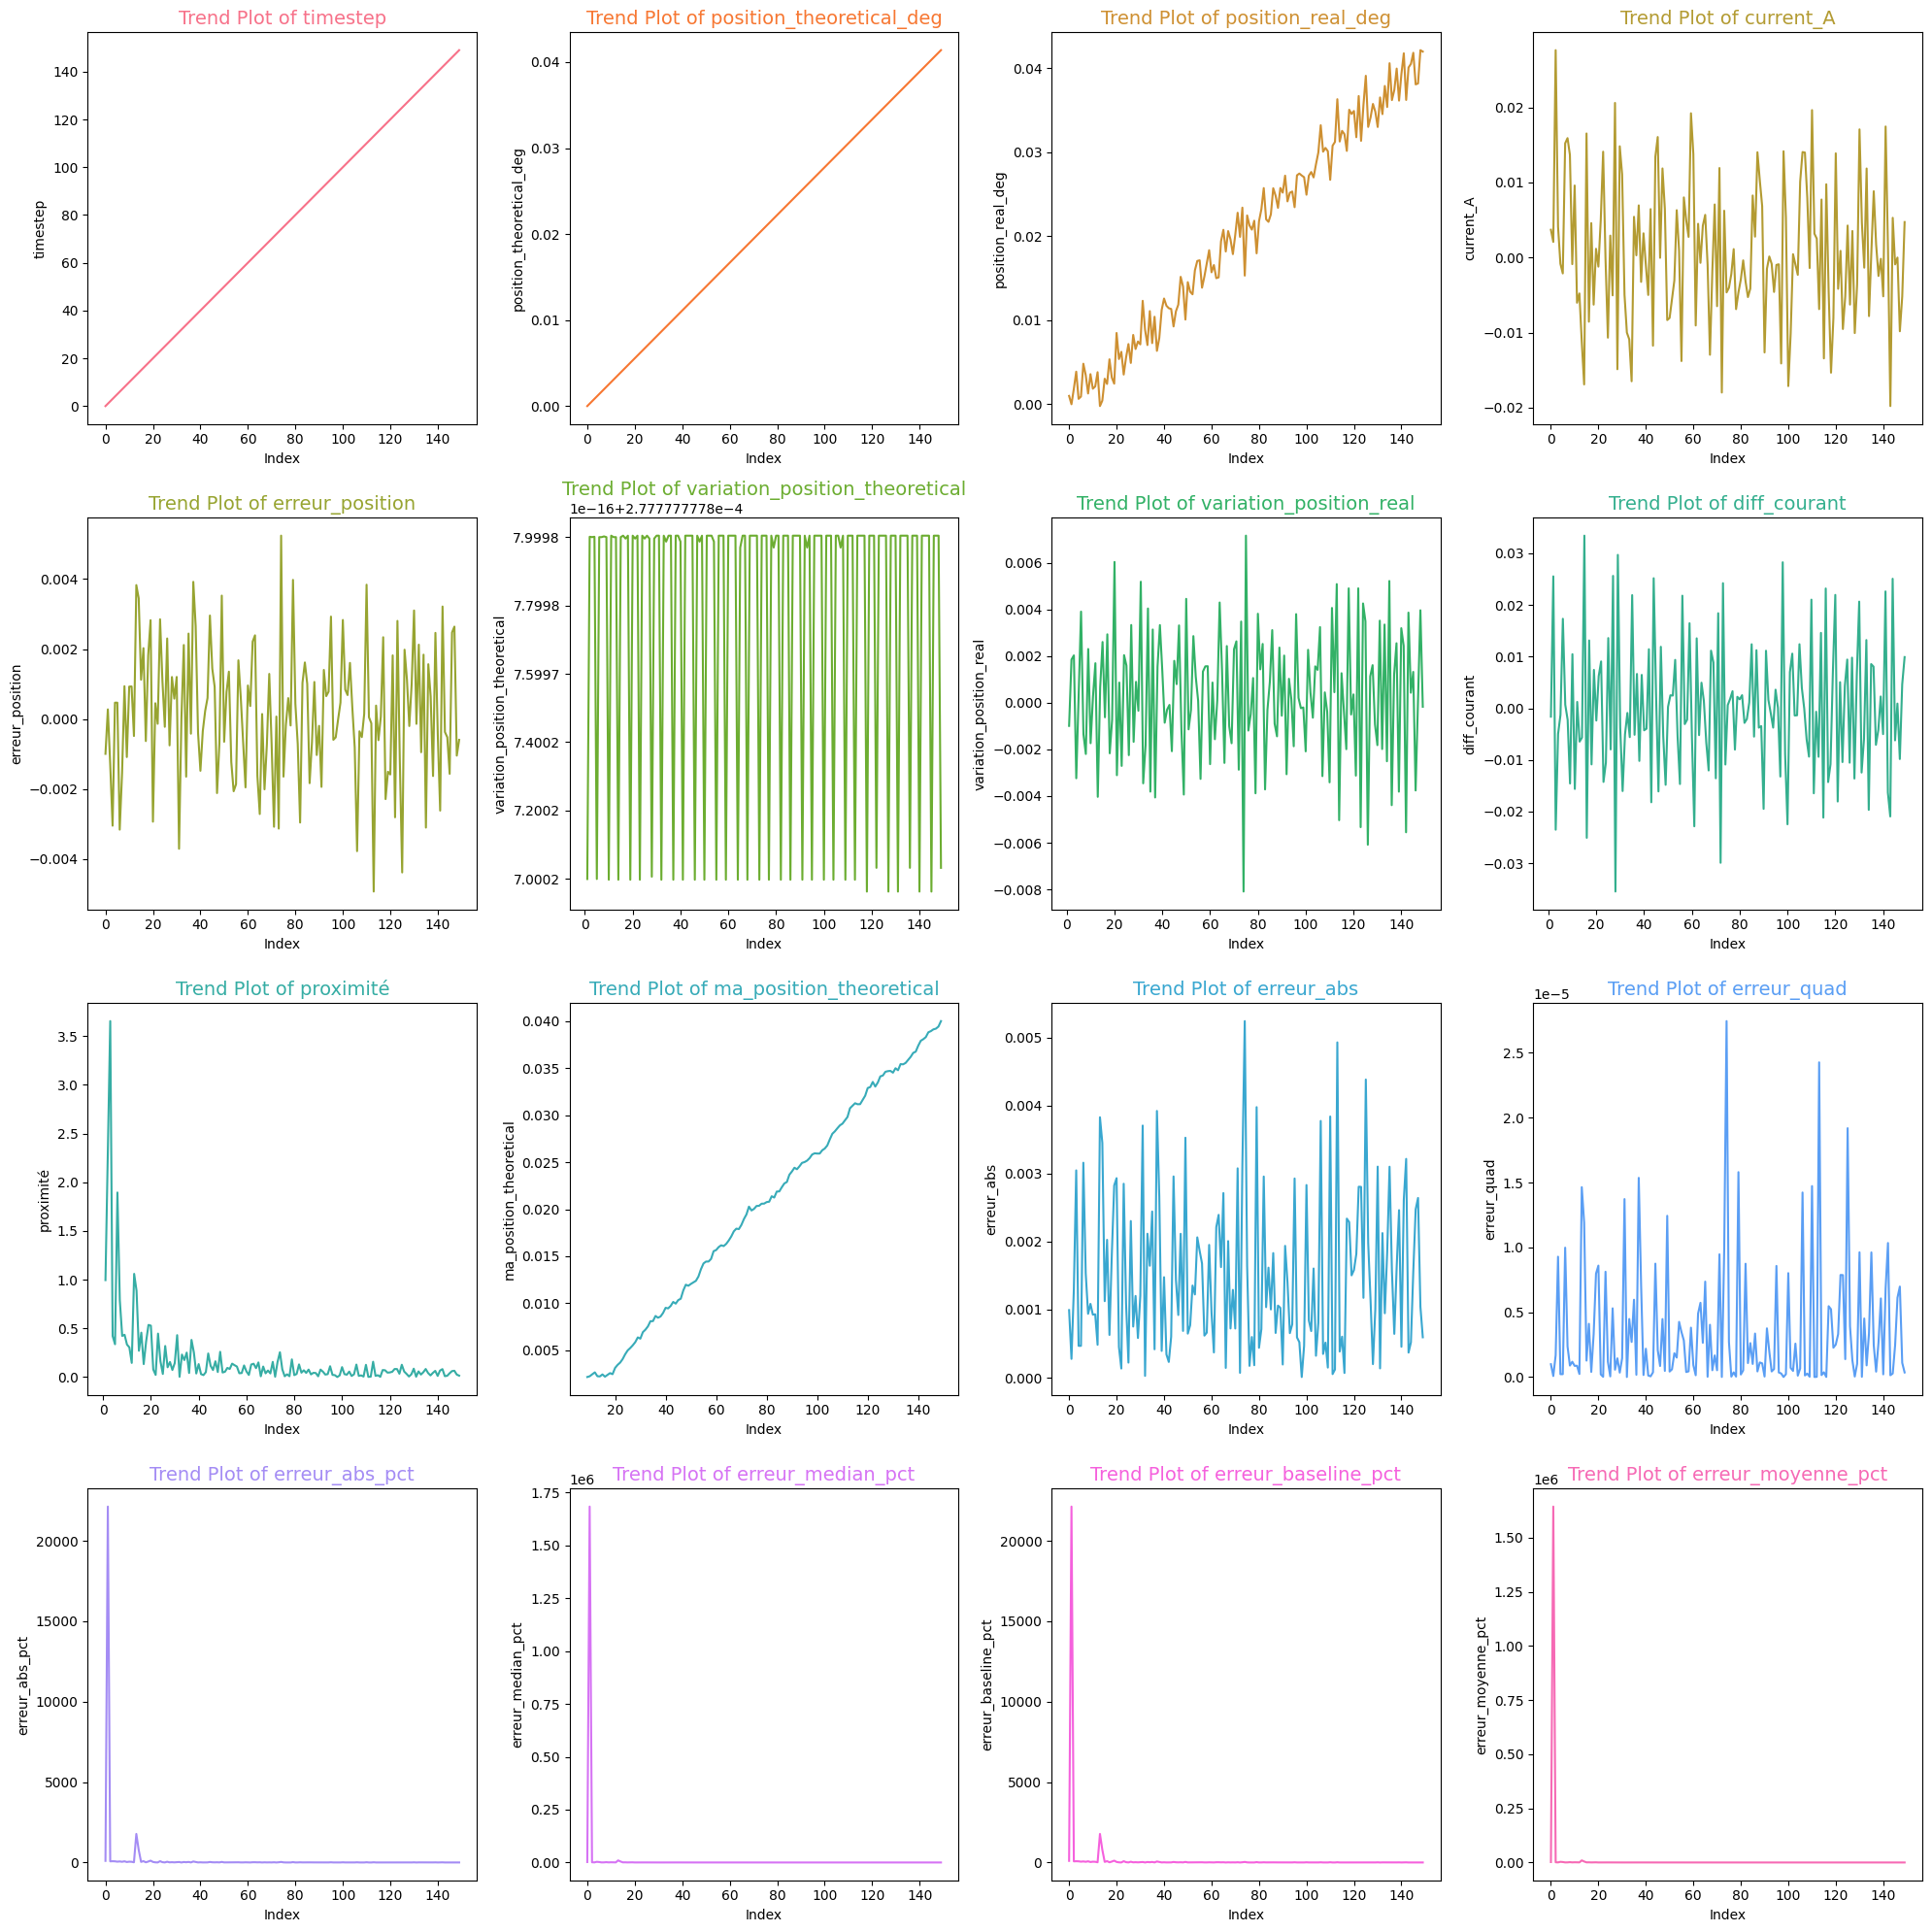

In [83]:
colors = sns.color_palette('husl', len(df.columns))

rows = -(-len(df.columns) // 4)
plt.figure(figsize=(20, 5 * rows))

for i, (col, color) in enumerate(zip(df.columns, colors), 1):
    plt.subplot(rows, 4, i)
    sns.lineplot(data=df[col], color=color)
    plt.title(f'Trend Plot of {col}', fontsize=14, color=color)
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

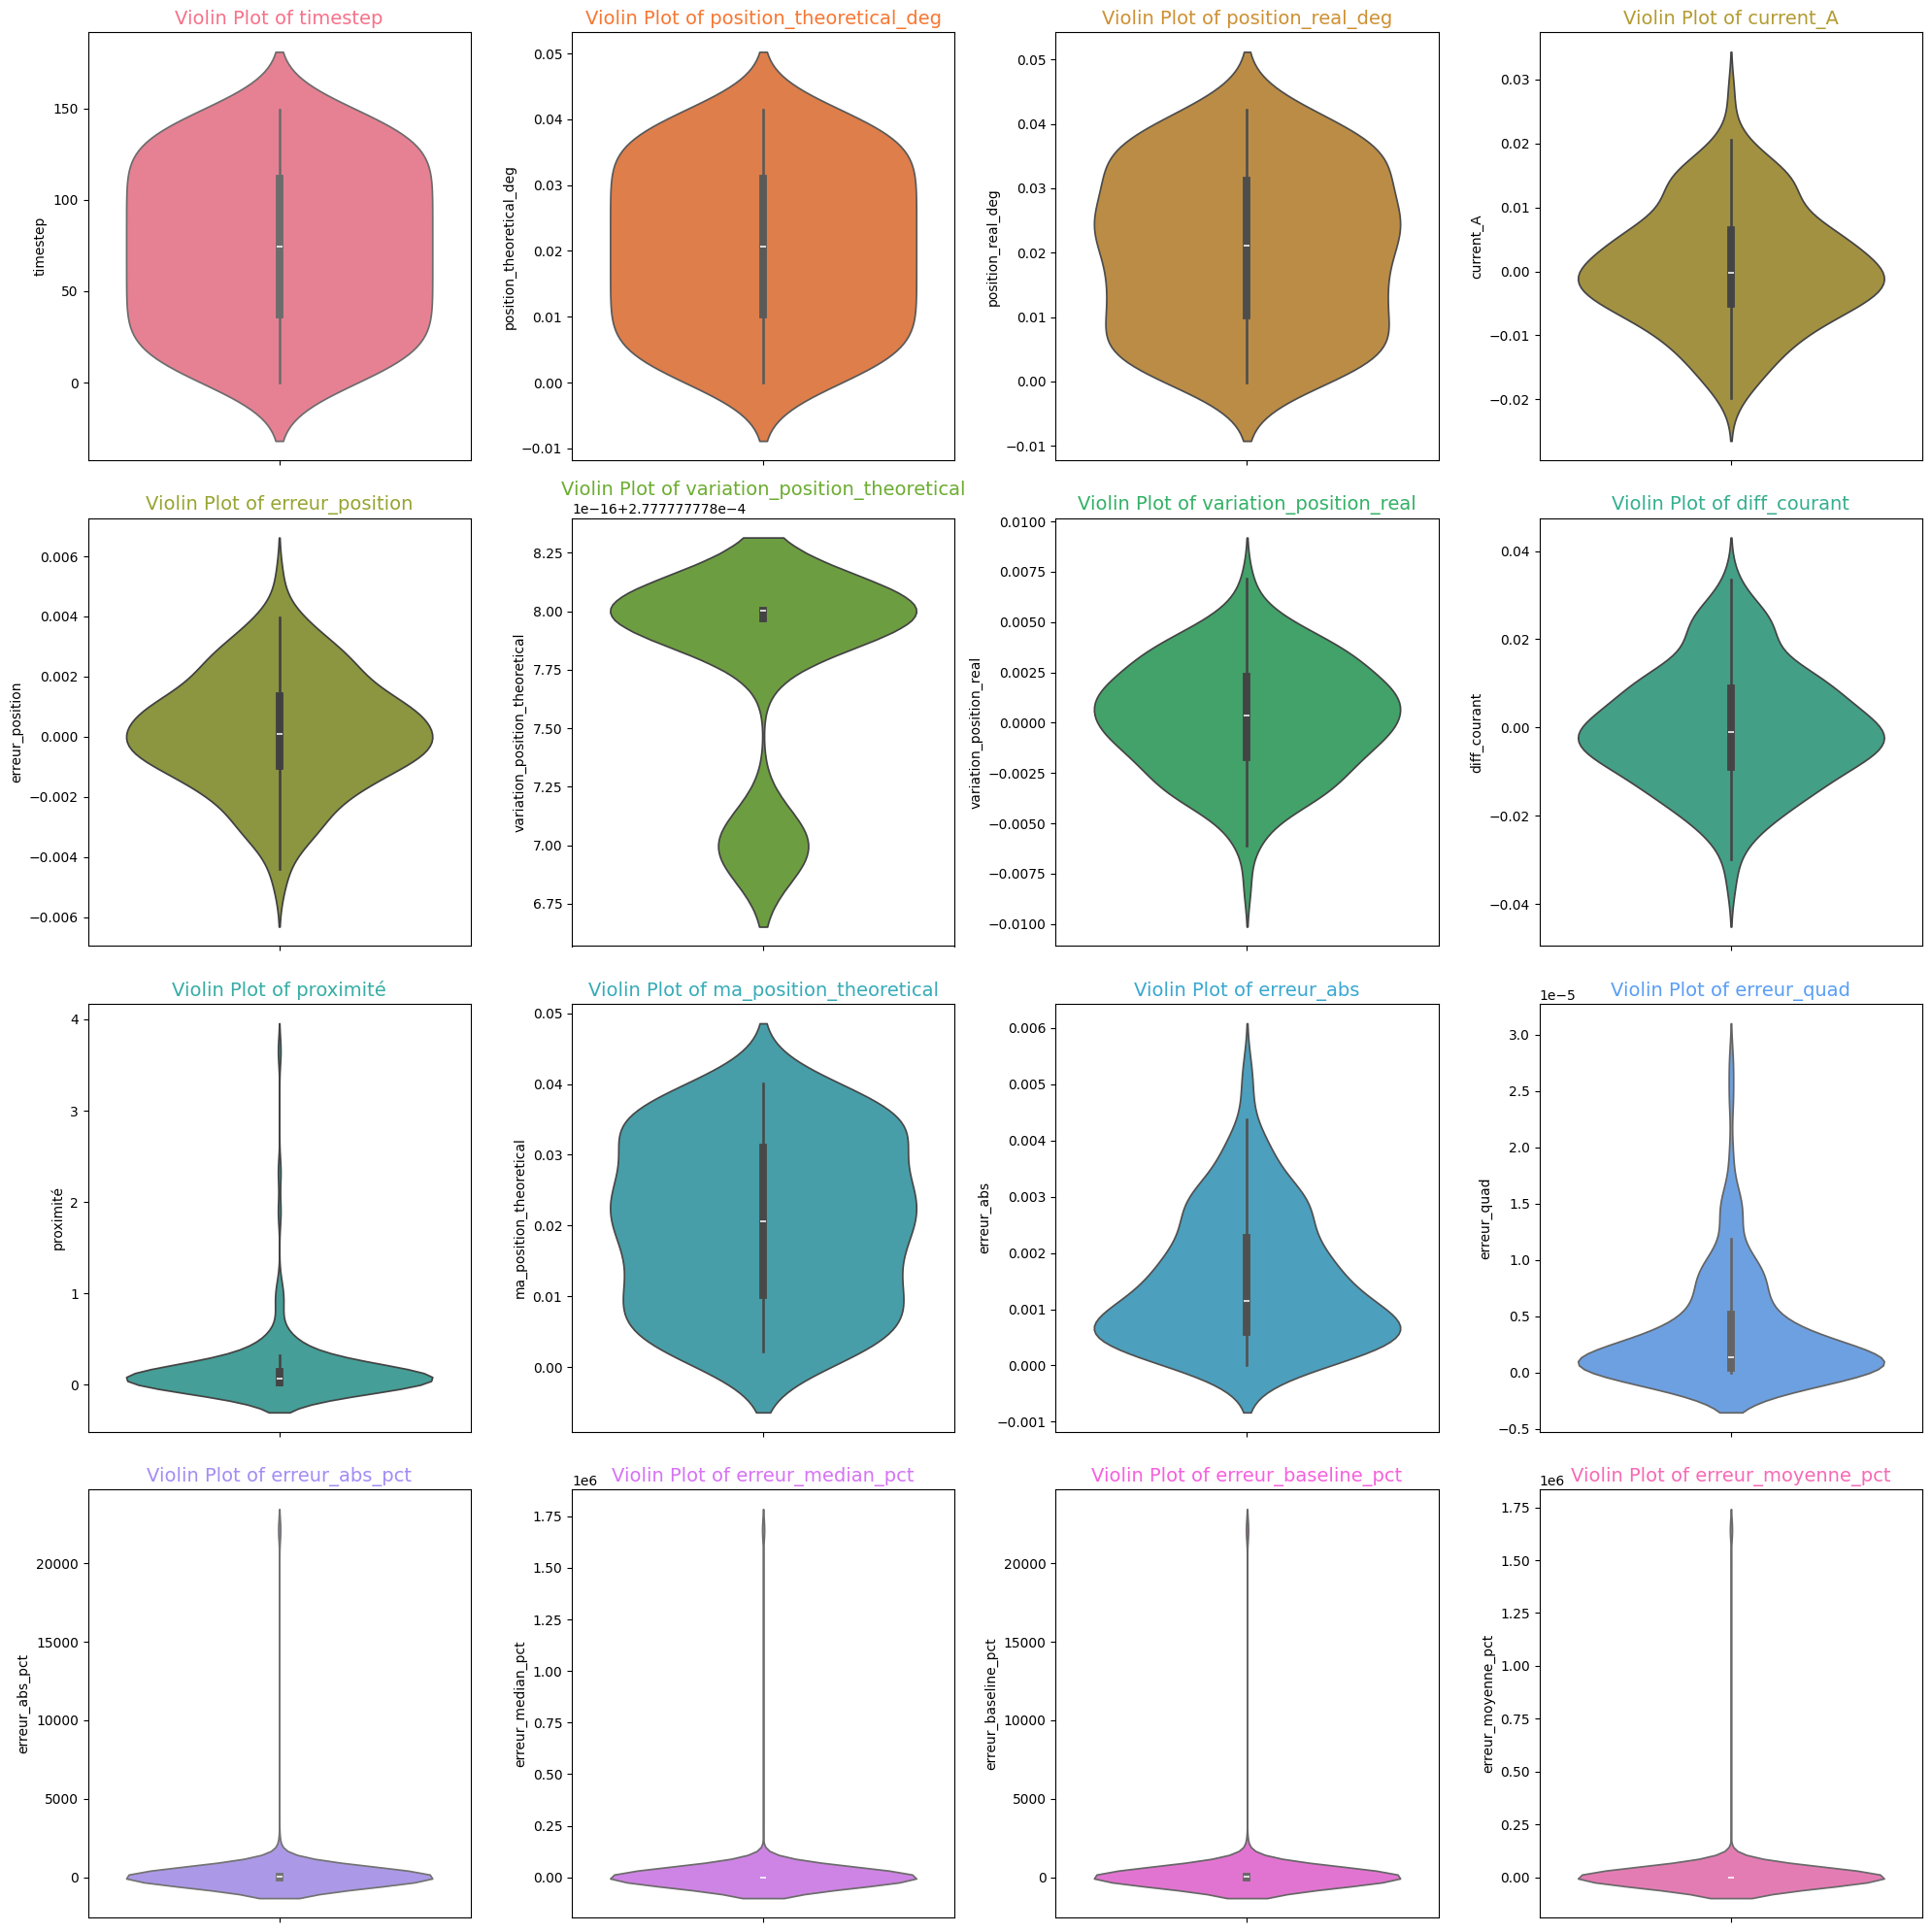

In [86]:
colors = sns.color_palette('husl', len(df.columns))
rows = -(-len(df.columns) // 4)
plt.figure(figsize=(20, 5 * rows))

for i, (col, color) in enumerate(zip(df.columns, colors), 1):
    plt.subplot(rows, 4, i)
    sns.violinplot(data=df, y=col, color=color)
    plt.title(f'Violin Plot of {col}', fontsize=14, color=color)
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

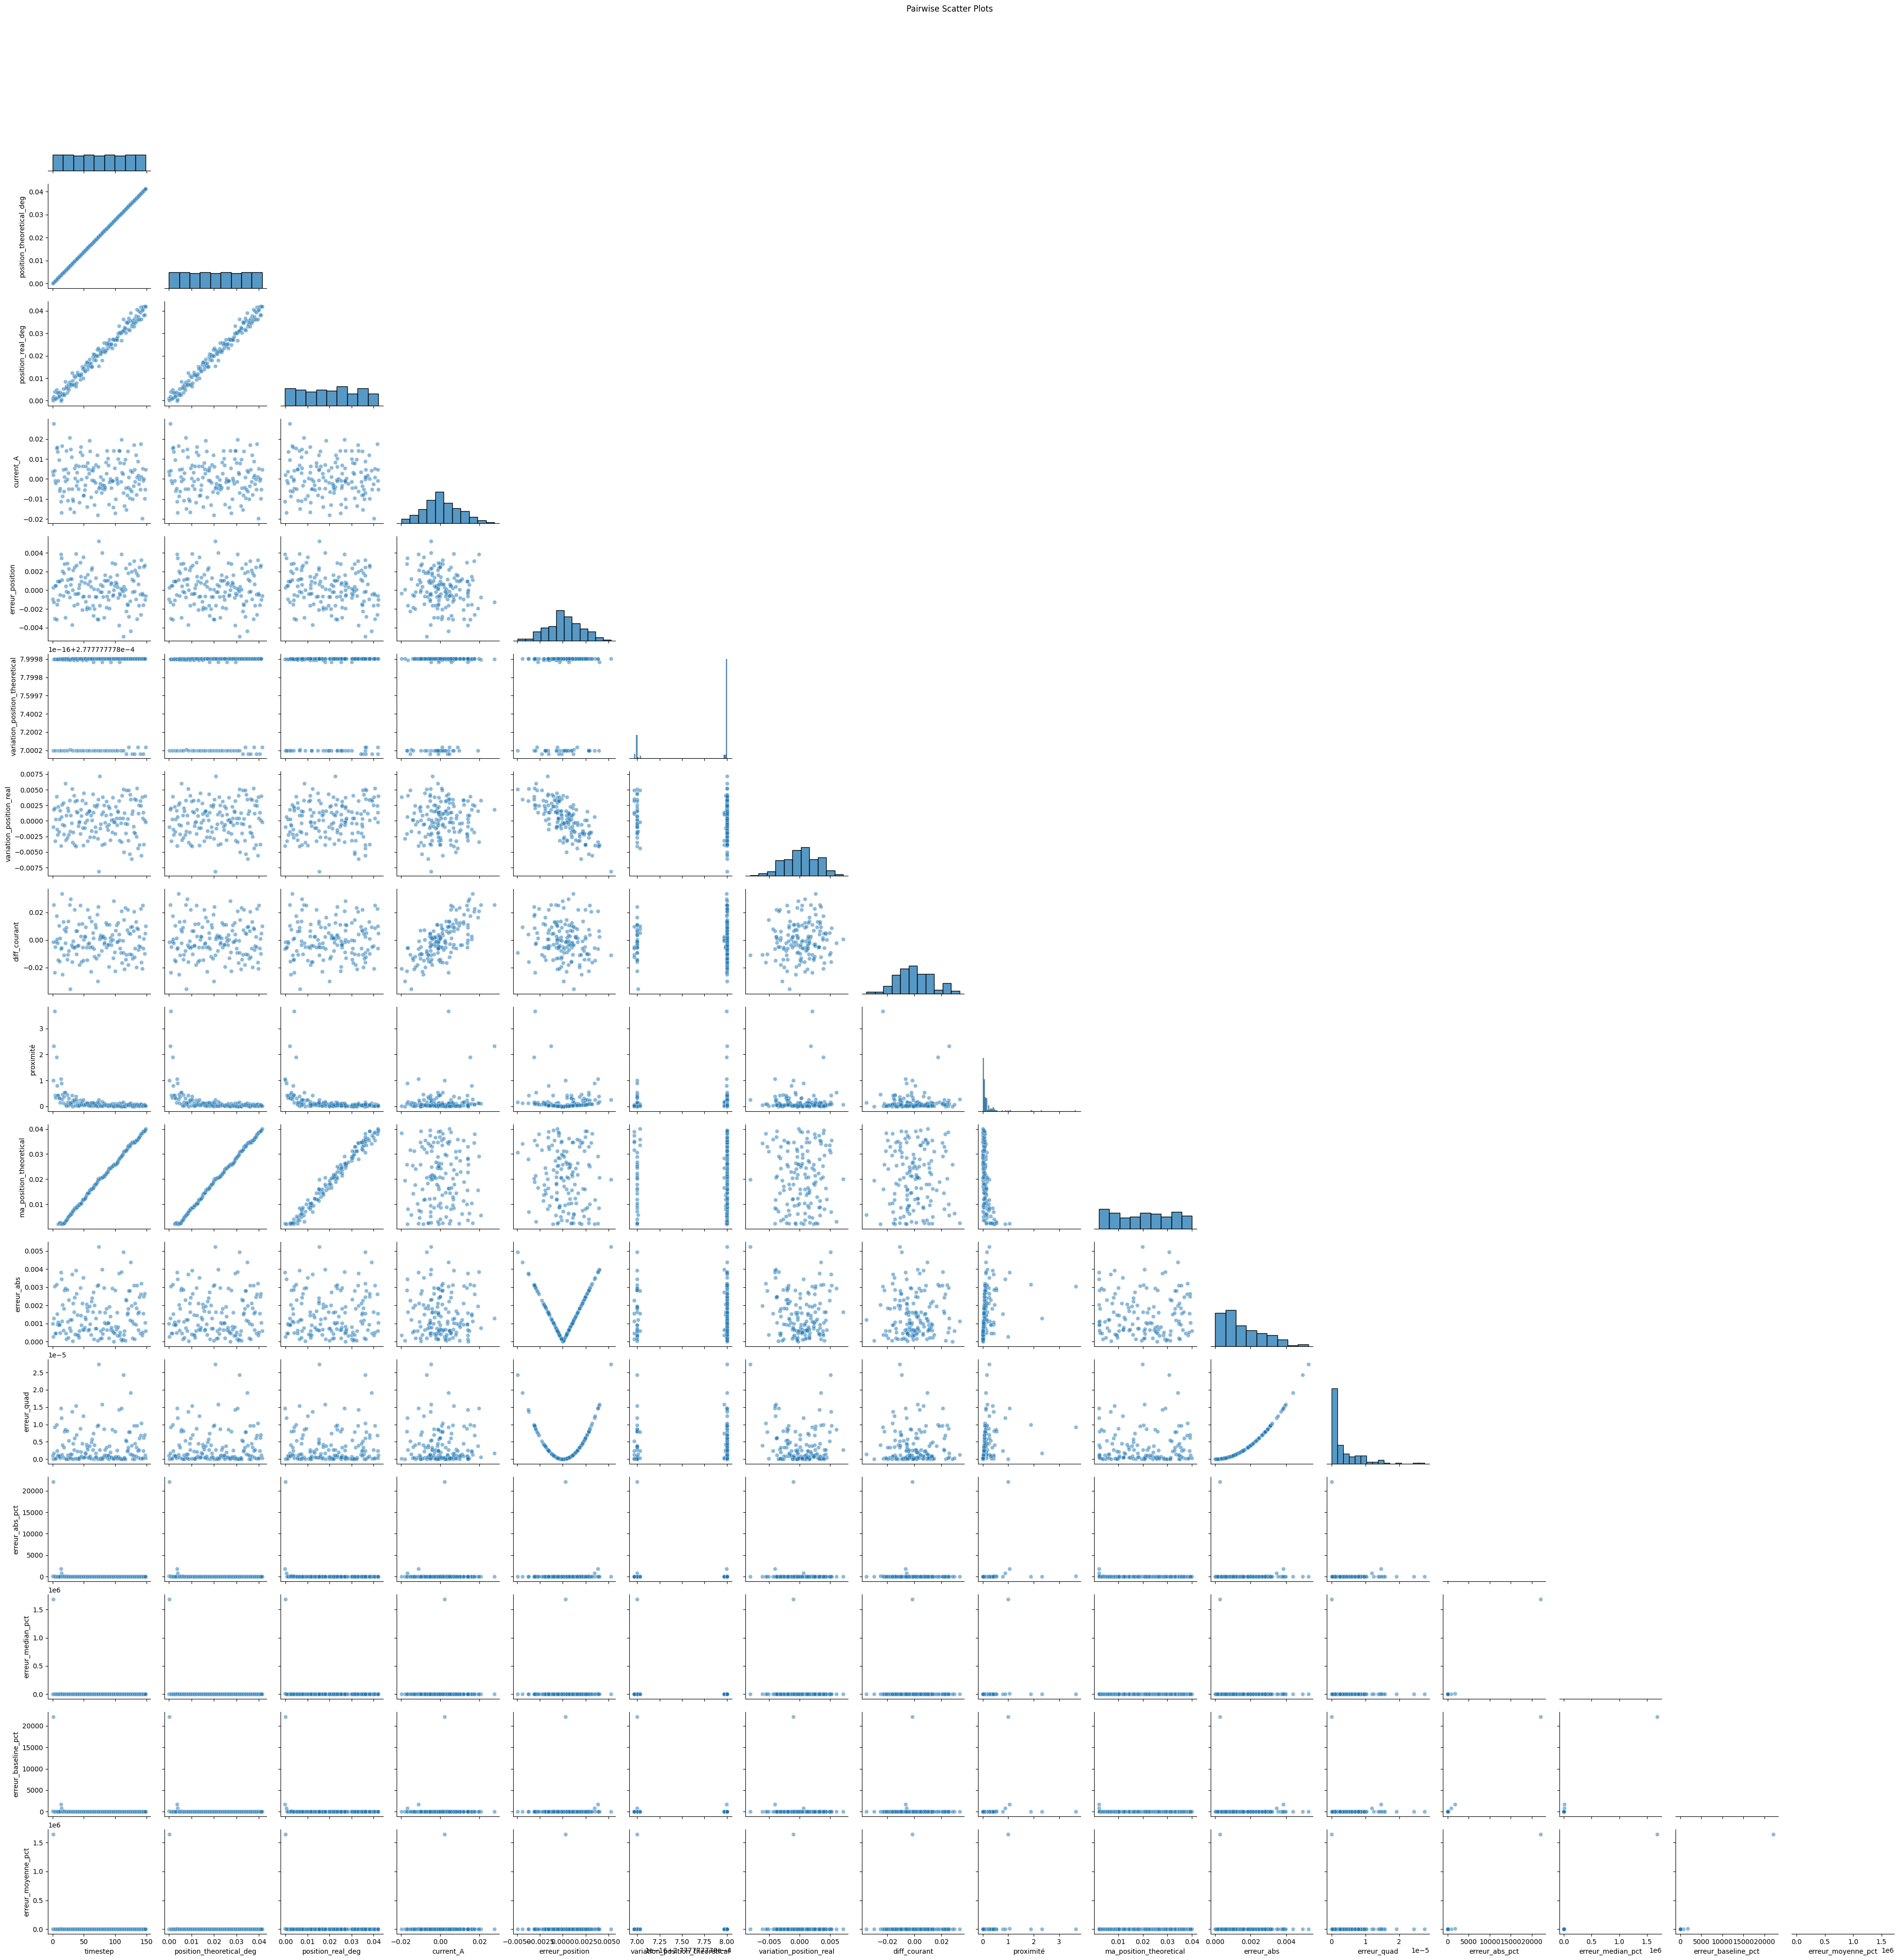

In [82]:
df = df[:150]

numeric_df = df.select_dtypes(include='number')

sns.pairplot(numeric_df, corner=True, plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Calcul de Baseline 

In [56]:
df['erreur_abs'] = np.abs(df['position_theoretical_deg'] - df['position_real_deg'])
mae_baseline = df['erreur_abs'].mean()
print(f"Erreur Absolue Moyenne (Baseline) : {mae_baseline}")

Erreur Absolue Moyenne (Baseline) : 0.0014965520050811987


In [57]:
df['erreur_quad'] = (df['position_theoretical_deg'] - df['position_real_deg'])**2
rmse_baseline = np.sqrt(df['erreur_quad'].mean())
print(f"Erreur Quadratique Moyenne (RMSE) (Baseline) : {rmse_baseline}")

Erreur Quadratique Moyenne (RMSE) (Baseline) : 0.001885594356049017


In [74]:
median_position_theoretical =  df['position_real_deg'].median()
mean_position_theoretical =  df['position_real_deg'].mean()

In [75]:
# Calcul de l'erreur absolue en pourcentage (APE)
df['erreur_abs_pct'] = np.abs(df['position_theoretical_deg'] - df['position_real_deg']) / np.abs(df['position_real_deg']) * 100

# MAE en pourcentage
mae_baseline_pct = df['erreur_abs_pct'].mean()
print(f"Erreur Absolue Moyenne en Pourcentage (Baseline) : {mae_baseline_pct:.2f}%")


Erreur Absolue Moyenne en Pourcentage (Baseline) : 179.12%


In [76]:
# Calcul de l'erreur absolue en pourcentage avec la médiane de la position théorique
df['erreur_median_pct'] = np.abs(df['position_real_deg'] - median_position_theoretical) / np.abs(df['position_real_deg']) * 100

# MAE en pourcentage pour cette baseline
mae_baseline_pct_median = df['erreur_median_pct'].mean()
print(f"MAE en % avec la Médiane : {mae_baseline_pct_median:.2f}%")


MAE en % avec la Médiane : 11488.89%


In [77]:
# Calcul de l'erreur absolue en pourcentage avec la position précédente
df['erreur_baseline_pct'] = np.abs(df['position_real_deg'] - df['position_theoretical_deg']) / np.abs(df['position_real_deg']) * 100

# MAE en pourcentage pour cette baseline
mae_baseline_pct_shift = df['erreur_baseline_pct'].mean()
print(f"MAE en % avec la Position Précédente : {mae_baseline_pct_shift:.2f}%")


MAE en % avec la Position Précédente : 179.12%


In [78]:
# Calcul de l'erreur absolue en pourcentage avec la moyenne de la position théorique
df['erreur_moyenne_pct'] = np.abs(df['position_real_deg'] - mean_position_theoretical) / np.abs(df['position_real_deg']) * 100

# MAE en pourcentage pour cette baseline
mae_baseline_pct_mean = df['erreur_moyenne_pct'].mean()
print(f"MAE en % avec la Moyenne : {mae_baseline_pct_mean:.2f}%")


MAE en % avec la Moyenne : 11211.41%
